In [1]:
from preprocessing import *
import preprocessing as prp
import pandas as pd
import torch
import torch.nn as nn
import torch.utils.data as data_utils
#from usad import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score
from postprocessing import *
from usad_conv import *

In [2]:
dataframe = pd.read_csv(r"/home/medoro/Unsupervised_Anomaly_Detection_thesis/data/train.csv")
dataframe.shape

(1749494, 57)

In [3]:
df=dataframe[['building_id','primary_use', 'timestamp', 'meter_reading', 'sea_level_pressure', 'is_holiday','anomaly']]
df

building_id                    primary_use            timestamp  \
0                  1                      Education  2016-01-01 00:00:00   
1                 32                         Office  2016-01-01 00:00:00   
2                 41                         Office  2016-01-01 00:00:00   
3                 55                         Office  2016-01-01 00:00:00   
4                 69                        Parking  2016-01-01 00:00:00   
...              ...                            ...                  ...   
1749489         1316  Entertainment/public assembly  2016-12-31 23:00:00   
1749490         1318  Entertainment/public assembly  2016-12-31 23:00:00   
1749491         1319  Entertainment/public assembly  2016-12-31 23:00:00   
1749492         1323                         Office  2016-12-31 23:00:00   
1749493         1353              Religious worship  2016-12-31 23:00:00   

         meter_reading  sea_level_pressure  is_holiday  anomaly  
0                  NaN               967.2           1        0  
1                  NaN               967.2           1        0  
2                  NaN               967.2           1        0  
3                  NaN               967.2           1        0  
4                  NaN               967.2           1        0  
...                ...                 ...         ...      ...  
1749489         38.844               967.2           0        0  
1749490        202.893               967.2           0        0  
1749491            NaN               967.2           0        0  
1749492        172.000               967.2           0        0  
1749493          2.400               967.2           0        0  

[1749494 rows x 7 columns]

In [4]:
imputed_df = impute_nulls(df)
imputed_df

building_id        primary_use            timestamp  meter_reading  \
0                  1          Education  2016-01-01 00:00:00      31.477940   
200                1          Education  2016-01-01 01:00:00      29.582970   
398                1          Education  2016-01-01 02:00:00      28.635485   
597                1          Education  2016-01-01 03:00:00      28.161742   
796                1          Education  2016-01-01 04:00:00      27.924871   
...              ...                ...                  ...            ...   
1748693         1353  Religious worship  2016-12-31 19:00:00       2.425000   
1748893         1353  Religious worship  2016-12-31 20:00:00       2.450000   
1749093         1353  Religious worship  2016-12-31 21:00:00       2.425000   
1749293         1353  Religious worship  2016-12-31 22:00:00       2.450000   
1749493         1353  Religious worship  2016-12-31 23:00:00       2.400000   

         sea_level_pressure  is_holiday  anomaly  
0                     967.2           1        0  
200                  1019.4           1        0  
398                  1018.8           1        0  
597                  1018.1           1        0  
796                  1019.0           1        0  
...                     ...         ...      ...  
1748693               967.2           0        0  
1748893               967.2           0        0  
1749093               967.2           0        0  
1749293               967.2           0        0  
1749493               967.2           0        0  

[1749494 rows x 7 columns]

Now that we have imputed the missing values for the column containing the energy consumption measurements, we can procees by adding a couple of features more and further imputing the missing dates for each timeseries in the dataset.

In [5]:
df = add_trigonometric_features(imputed_df)
df

building_id        primary_use           timestamp  meter_reading  \
0                  1          Education 2016-01-01 00:00:00      31.477940   
200                1          Education 2016-01-01 01:00:00      29.582970   
398                1          Education 2016-01-01 02:00:00      28.635485   
597                1          Education 2016-01-01 03:00:00      28.161742   
796                1          Education 2016-01-01 04:00:00      27.924871   
...              ...                ...                 ...            ...   
1748693         1353  Religious worship 2016-12-31 19:00:00       2.425000   
1748893         1353  Religious worship 2016-12-31 20:00:00       2.450000   
1749093         1353  Religious worship 2016-12-31 21:00:00       2.425000   
1749293         1353  Religious worship 2016-12-31 22:00:00       2.450000   
1749493         1353  Religious worship 2016-12-31 23:00:00       2.400000   

         sea_level_pressure  is_holiday  anomaly  weekday  weekday_y  \
0                     967.2           1        0        4  -0.433884   
200                  1019.4           1        0        4  -0.433884   
398                  1018.8           1        0        4  -0.433884   
597                  1018.1           1        0        4  -0.433884   
796                  1019.0           1        0        4  -0.433884   
...                     ...         ...      ...      ...        ...   
1748693               967.2           0        0        5  -0.974928   
1748893               967.2           0        0        5  -0.974928   
1749093               967.2           0        0        5  -0.974928   
1749293               967.2           0        0        5  -0.974928   
1749493               967.2           0        0        5  -0.974928   

         weekday_x  
0        -0.900969  
200      -0.900969  
398      -0.900969  
597      -0.900969  
796      -0.900969  
...            ...  
1748693  -0.222521  
1748893  -0.222521  
1749093  -0.222521  
1749293  -0.222521  
1749493  -0.222521  

[1749494 rows x 10 columns]

In [6]:
dfs_dict = impute_missing_dates(df)

/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:78: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_index = pd.date_range(start_ts, end=end_ts, freq="1H")


In [7]:
dfs_dict

{1:                      building_id primary_use  meter_reading  \
 2016-01-01 00:00:00            1   Education      31.477940   
 2016-01-01 01:00:00            1   Education      29.582970   
 2016-01-01 02:00:00            1   Education      28.635485   
 2016-01-01 03:00:00            1   Education      28.161742   
 2016-01-01 04:00:00            1   Education      27.924871   
 ...                          ...         ...            ...   
 2016-12-31 19:00:00            1   Education      20.006000   
 2016-12-31 20:00:00            1   Education      15.364000   
 2016-12-31 21:00:00            1   Education      15.685000   
 2016-12-31 22:00:00            1   Education      15.925000   
 2016-12-31 23:00:00            1   Education      14.964000   
 
                      sea_level_pressure  is_holiday  anomaly  weekday  \
 2016-01-01 00:00:00               967.2           1        0        4   
 2016-01-01 01:00:00              1019.4           1        0        4   
 2016

In [8]:
df1 = pd.concat(dfs_dict.values())
df1

building_id        primary_use  meter_reading  \
2016-01-01 00:00:00            1          Education      31.477940   
2016-01-01 01:00:00            1          Education      29.582970   
2016-01-01 02:00:00            1          Education      28.635485   
2016-01-01 03:00:00            1          Education      28.161742   
2016-01-01 04:00:00            1          Education      27.924871   
...                          ...                ...            ...   
2016-12-31 19:00:00         1353  Religious worship       2.425000   
2016-12-31 20:00:00         1353  Religious worship       2.450000   
2016-12-31 21:00:00         1353  Religious worship       2.425000   
2016-12-31 22:00:00         1353  Religious worship       2.450000   
2016-12-31 23:00:00         1353  Religious worship       2.400000   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00               967.2           1        0        4   
2016-01-01 01:00:00              1019.4           1        0        4   
2016-01-01 02:00:00              1018.8           1        0        4   
2016-01-01 03:00:00              1018.1           1        0        4   
2016-01-01 04:00:00              1019.0           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[1756800 rows x 9 columns]

Let's now obtain the train and validation set. We are going to split the dataset into 2 sets, according to the building id.

In [9]:
#dfs_train, dfs_val = train_val_split(df1)
#train = pd.concat(dfs_train.values())

In [10]:
#val = pd.concat(dfs_val.values())

In [11]:
dfs_train, dfs_val, dfs_test = train_val_test_split(df1)
train = pd.concat(dfs_train.values())

In [12]:
val = pd.concat(dfs_val.values())

In [13]:
test = pd.concat(dfs_test.values())

In [14]:
train

building_id primary_use  meter_reading  \
2016-01-01 00:00:00            1   Education      31.477940   
2016-01-01 01:00:00            1   Education      29.582970   
2016-01-01 02:00:00            1   Education      28.635485   
2016-01-01 03:00:00            1   Education      28.161742   
2016-01-01 04:00:00            1   Education      27.924871   
...                          ...         ...            ...   
2016-12-31 19:00:00         1238      Office      54.900000   
2016-12-31 20:00:00         1238      Office      56.000000   
2016-12-31 21:00:00         1238      Office      66.400000   
2016-12-31 22:00:00         1238      Office      67.100000   
2016-12-31 23:00:00         1238      Office      71.400000   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00               967.2           1        0        4   
2016-01-01 01:00:00              1019.4           1        0        4   
2016-01-01 02:00:00              1018.8           1        0        4   
2016-01-01 03:00:00              1018.1           1        0        4   
2016-01-01 04:00:00              1019.0           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[1133136 rows x 9 columns]

In [15]:
val

building_id        primary_use  meter_reading  \
2016-01-01 00:00:00         1241         Healthcare        234.180   
2016-01-01 01:00:00         1241         Healthcare        294.156   
2016-01-01 02:00:00         1241         Healthcare        354.152   
2016-01-01 03:00:00         1241         Healthcare        294.121   
2016-01-01 04:00:00         1241         Healthcare        294.102   
...                          ...                ...            ...   
2016-12-31 19:00:00         1353  Religious worship          2.425   
2016-12-31 20:00:00         1353  Religious worship          2.450   
2016-12-31 21:00:00         1353  Religious worship          2.425   
2016-12-31 22:00:00         1353  Religious worship          2.450   
2016-12-31 23:00:00         1353  Religious worship          2.400   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00              1018.9           1        0        4   
2016-01-01 01:00:00              1018.4           1        0        4   
2016-01-01 02:00:00              1018.2           1        0        4   
2016-01-01 03:00:00              1018.3           1        0        4   
2016-01-01 04:00:00              1018.2           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[289872 rows x 9 columns]

In [16]:
test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00      19.232375               967.2           1        0   
2016-01-01 01:00:00      13.457187              1019.4           1        0   
2016-01-01 02:00:00      10.569594              1018.8           1        0   
2016-01-01 03:00:00       9.125797              1018.1           1        0   
2016-01-01 04:00:00       8.403898              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00     132.040616               967.2           0        0   
2016-12-31 20:00:00     132.040616               967.2           0        0   
2016-12-31 21:00:00     132.040616               967.2           0        0   
2016-12-31 22:00:00     132.040616               967.2           0        0   
2016-12-31 23:00:00     132.040616               967.2           0        0   

                     weekday  weekday_y  weekday_x  
2016-01-01 00:00:00        4  -0.433884  -0.900969  
2016-01-01 01:00:00        4  -0.433884  -0.900969  
2016-01-01 02:00:00        4  -0.433884  -0.900969  
2016-01-01 03:00:00        4  -0.433884  -0.900969  
2016-01-01 04:00:00        4  -0.433884  -0.900969  
...                      ...        ...        ...  
2016-12-31 19:00:00        5  -0.974928  -0.222521  
2016-12-31 20:00:00        5  -0.974928  -0.222521  
2016-12-31 21:00:00        5  -0.974928  -0.222521  
2016-12-31 22:00:00        5  -0.974928  -0.222521  
2016-12-31 23:00:00        5  -0.974928  -0.222521  

[333792 rows x 9 columns]

In [17]:
train_window = 72

In [18]:
#X, y = split_sequences(train, train_window)
X_train, y_train = create_train_eval_sequences(train, train_window)

In [19]:
X_train, y_train

(array([[[0.60893402],
         [0.54943545],
         [0.51968617],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        [[0.54943545],
         [0.51968617],
         [0.50481153],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        [[0.51968617],
         [0.50481153],
         [0.49737421],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        ...,
 
        [[0.49600426],
         [0.53063399],
         [0.53063399],
         ...,
         [0.29088972],
         [0.28716036],
         [0.29302078]],
 
        [[0.53063399],
         [0.53063399],
         [0.4389984 ],
         ...,
         [0.28716036],
         [0.29302078],
         [0.34842834]],
 
        [[0.53063399],
         [0.4389984 ],
         [0.45285029],
         ...,
         [0.29302078],
         [0.34842834],
         [0.3521577 ]]]),
 array([[0.60893402, 0.54943545, 0.51968617, ..., 0.489

In [20]:
X_train.shape, y_train.shape

((1123848, 72, 1), (1123848, 72))

In [21]:
BATCH_SIZE =  128
N_EPOCHS = 40
hidden_size = 1/8

In [22]:
w_size = X_train.shape[1] * X_train.shape[2]
z_size = w_size * hidden_size #X_train.shape[1] * hidden_size 
w_size, z_size

(72, 9.0)

In [23]:
z_size = int(z_size)

In [24]:
z_size

9

In [25]:
import torch.utils.data as data_utils

In [26]:
train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X_train).float().view(([X_train.shape[0], w_size, 1]))), batch_size = BATCH_SIZE, shuffle = False, num_workers = 0)

In [27]:
#X_val, y_val = split_sequences(val, train_window)
X_val, y_val = create_train_eval_sequences(val, train_window)

In [28]:
X_val.shape, y_val.shape

((287496, 72, 1), (287496, 72))

In [29]:
val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X_val).float().view(([X_val.shape[0],w_size, 1]))) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [30]:
device = get_default_device()
device

device(type='cuda')

In [31]:
! export CUDA_VISIBLE_DEVICES=2

In [32]:
model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [33]:
N_EPOCHS = 50

In [34]:
history = training(N_EPOCHS,model,train_loader,val_loader) #2.15 min a epoch ---> 7/11% gpu (uni/multi) #Conv_autoencoder: 2.45 min --> 22% gpu

Epoch [0], val_loss1: 0.0018, val_loss2: 0.0017
Epoch [1], val_loss1: 0.0228, val_loss2: -0.0056
Epoch [2], val_loss1: 0.0188, val_loss2: -0.0108
Epoch [3], val_loss1: 0.0192, val_loss2: -0.0132
Epoch [4], val_loss1: 0.0172, val_loss2: -0.0131
Epoch [5], val_loss1: 0.0155, val_loss2: -0.0124
Epoch [6], val_loss1: 0.0176, val_loss2: -0.0146
Epoch [7], val_loss1: 0.0200, val_loss2: -0.0169
Epoch [8], val_loss1: 0.0267, val_loss2: -0.0231
Epoch [9], val_loss1: 0.0209, val_loss2: -0.0181
Epoch [10], val_loss1: 0.0238, val_loss2: -0.0211
Epoch [11], val_loss1: 0.0253, val_loss2: -0.0228
Epoch [12], val_loss1: 0.0262, val_loss2: -0.0237
Epoch [13], val_loss1: 0.0249, val_loss2: -0.0226
Epoch [14], val_loss1: 0.0337, val_loss2: -0.0303
Epoch [15], val_loss1: 0.0513, val_loss2: -0.0450
Epoch [16], val_loss1: 0.0666, val_loss2: -0.0491
Epoch [17], val_loss1: 0.0511, val_loss2: -0.0435
Epoch [18], val_loss1: 0.0490, val_loss2: -0.0429
Epoch [19], val_loss1: 0.0513, val_loss2: -0.0459
Epoch [20],

In [102]:
history

[{'val_loss1': 0.012432618997991085, 'val_loss2': 0.01248127594590187},
 {'val_loss1': 0.009076920337975025, 'val_loss2': -0.00038316144491545856},
 {'val_loss1': 0.01321498118340969, 'val_loss2': -0.00624183751642704},
 {'val_loss1': 0.015111022628843784, 'val_loss2': -0.009251274168491364},
 {'val_loss1': 0.014545709826052189, 'val_loss2': -0.010020000860095024},
 {'val_loss1': 0.015274261124432087, 'val_loss2': -0.011379157193005085},
 {'val_loss1': 0.0171342846006155, 'val_loss2': -0.013605887070298195},
 {'val_loss1': 0.01716468296945095, 'val_loss2': -0.013952409848570824},
 {'val_loss1': 0.02210915833711624, 'val_loss2': -0.018632512539625168},
 {'val_loss1': 0.02399449050426483, 'val_loss2': -0.020513160154223442},
 {'val_loss1': 0.024042818695306778, 'val_loss2': -0.020792875438928604},
 {'val_loss1': 0.02726539596915245, 'val_loss2': -0.024134311825037003},
 {'val_loss1': 0.024536971002817154, 'val_loss2': -0.021908242255449295},
 {'val_loss1': 0.02080295793712139, 'val_loss2

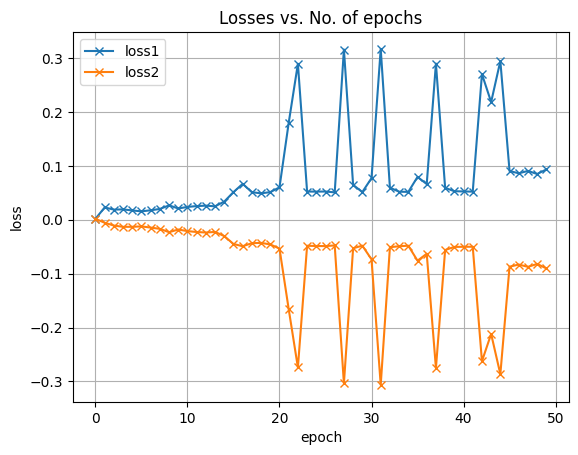

In [35]:
plot_history(history)

In [ ]:
# /home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints


In [36]:
print(model)

UsadModel(
  (encoder): Encoder(
    (conv1): Conv1d(1, 32, kernel_size=(7,), stride=(2,), padding=(3,))
    (conv2): Conv1d(32, 16, kernel_size=(7,), stride=(2,), padding=(3,))
    (conv3): Conv1d(16, 8, kernel_size=(7,), stride=(2,), padding=(3,))
    (relu): ReLU(inplace=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (decoder1): Decoder(
    (conv1): ConvTranspose1d(8, 16, kernel_size=(7,), stride=(2,), padding=(3,), output_padding=(1,))
    (conv3): ConvTranspose1d(16, 32, kernel_size=(7,), stride=(2,), padding=(3,), output_padding=(1,))
    (conv4): ConvTranspose1d(32, 1, kernel_size=(7,), stride=(2,), padding=(3,), output_padding=(1,))
    (relu): ReLU(inplace=True)
    (dropout): Dropout(p=0.2, inplace=False)
    (sigmoid): Sigmoid()
  )
  (decoder2): Decoder(
    (conv1): ConvTranspose1d(8, 16, kernel_size=(7,), stride=(2,), padding=(3,), output_padding=(1,))
    (conv3): ConvTranspose1d(16, 32, kernel_size=(7,), stride=(2,), padding=(3,), output_padding=(1,))
    (co

In [36]:
torch.save({
            #'epoch': N_EPOCHS,
            #'model': model.state_dict(),
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "/home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints/model_50epochs_uni_conv.pth")

In [34]:
checkpoint = torch.load("/home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints/model_test2_5epochs.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [36]:
"""
def create_train_eval_sequences(dataframe, time_steps):
  scaler = MinMaxScaler(feature_range=(0,1))
  output = []
  output2=[]
  for building_id, gdf in dataframe.groupby("building_id"):
      gdf[['meter_reading', 'sea_level_pressure']] = scaler.fit_transform(gdf[['meter_reading', 'sea_level_pressure']])
      building_data = np.array(gdf[['meter_reading']]).astype(float) #, 'weekday_x', 'weekday_y', 'is_holiday'
      for i in range(len(building_data) - time_steps + 1):
        # find the end of this sequence
        end_ix = i + time_steps
        # check if we are beyond the dataset length for this building
        if end_ix > len(building_data)-1:
          break
        output.append(building_data[i : (i + time_steps),:])
        output2.append(building_data[i : (i + time_steps),0])
  return np.stack(output), np.stack(output2)"""

In [37]:
X_test, y_test = create_train_eval_sequences(test, train_window)

In [38]:
X_test.shape, y_test.shape

((331056, 72, 1), (331056, 72))

In [39]:
test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(X_test).float().view(([X_test.shape[0],w_size, 1]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [40]:
results=testing(model,test_loader) #Prova con il test set

In [66]:
results, w1, w2 = testing_prova(model, test_loader)

In [67]:
results
# NOTA: con usad_conv results risulta una lista di 2587 tensori, di dimesione [128, 1], tranne l'ultimo che ha dimensione [48, 1]
# Similmente per w1 e w2, che al posti di avere dimensione [128, 72], o [48, 72] nel caso dell'ultimo tensore, avranno dim = [128/48, 72, 1]
# Bisogna quindi fare reshape

[tensor([[0.0893],
         [0.0879],
         [0.0972],
         [0.0916],
         [0.0905],
         [0.0990],
         [0.0906],
         [0.0965],
         [0.0907],
         [0.0907],
         [0.0894],
         [0.1128],
         [0.0894],
         [0.0907],
         [0.0907],
         [0.0920],
         [0.0965],
         [0.0933],
         [0.0920],
         [0.0907],
         [0.0894],
         [0.0920],
         [0.0965],
         [0.0894],
         [0.1057],
         [0.0907],
         [0.0920],
         [0.0907],
         [0.0978],
         [0.0920],
         [0.0907],
         [0.0978],
         [0.0907],
         [0.0907],
         [0.0920],
         [0.0894],
         [0.0907],
         [0.0894],
         [0.0983],
         [0.0894],
         [0.0907],
         [0.0920],
         [0.0949],
         [0.0907],
         [0.0894],
         [0.0920],
         [0.0899],
         [0.0857],
         [0.0907],
         [0.0920],
         [0.0920],
         [0.0907],
         [0.

In [68]:
w1

[tensor([[[0.4273],
          [0.4273],
          [0.4273],
          ...,
          [0.4273],
          [0.4273],
          [0.4273]],
 
         [[0.4273],
          [0.4273],
          [0.4273],
          ...,
          [0.4273],
          [0.4273],
          [0.4273]],
 
         [[0.4273],
          [0.4273],
          [0.4273],
          ...,
          [0.4273],
          [0.4273],
          [0.4273]],
 
         ...,
 
         [[0.4273],
          [0.4273],
          [0.4273],
          ...,
          [0.4273],
          [0.4273],
          [0.4273]],
 
         [[0.4273],
          [0.4273],
          [0.4273],
          ...,
          [0.4273],
          [0.4273],
          [0.4273]],
 
         [[0.4273],
          [0.4273],
          [0.4273],
          ...,
          [0.4273],
          [0.4273],
          [0.4273]]], device='cuda:0'),
 tensor([[[0.4273],
          [0.4273],
          [0.4273],
          ...,
          [0.4273],
          [0.4273],
          [0.4273]],
 
 

In [69]:
w2

[tensor([[[0.4485],
          [0.4485],
          [0.4485],
          ...,
          [0.4485],
          [0.4485],
          [0.4485]],
 
         [[0.4485],
          [0.4485],
          [0.4485],
          ...,
          [0.4485],
          [0.4485],
          [0.4485]],
 
         [[0.0000],
          [1.0000],
          [0.0000],
          ...,
          [0.4485],
          [0.4485],
          [0.4485]],
 
         ...,
 
         [[0.0000],
          [1.0000],
          [0.0000],
          ...,
          [0.4485],
          [0.4485],
          [0.4485]],
 
         [[0.4485],
          [0.4485],
          [0.4485],
          ...,
          [0.4485],
          [0.4485],
          [0.4485]],
 
         [[0.4485],
          [0.4485],
          [0.4485],
          ...,
          [0.4485],
          [0.4485],
          [0.4485]]], device='cuda:0'),
 tensor([[[0.4485],
          [0.4485],
          [0.4485],
          ...,
          [0.4485],
          [0.4485],
          [0.4485]],
 
 

In [109]:
len(w1)

2587

In [172]:
len(w2)

2587

In [64]:
len(w1[1]), len(w1[-1])

(128, 48)

In [65]:
len(w2[1]), len(w2[-1])

(128, 48)

In [106]:
# Reshape dei tensori corrispondenti a w1 e w2
w1_new = [torch.reshape(w1_el, (w1_el.size()[0], w1_el.size()[1])) for w1_el in w1]

In [111]:
w2_new = [torch.reshape(w2_el, (w2_el.size()[0], w2_el.size()[1])) for w2_el in w2]

In [107]:
w1_new

[tensor([[0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         ...,
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273]],
        device='cuda:0'),
 tensor([[0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         ...,
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273]],
        device='cuda:0'),
 tensor([[0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
        

In [112]:
w2_new

[tensor([[0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
         [0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
         [0.0000, 1.0000, 0.0000,  ..., 0.4485, 0.4485, 0.4485],
         ...,
         [0.0000, 1.0000, 0.0000,  ..., 0.4485, 0.4485, 0.4485],
         [0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
         [0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485]],
        device='cuda:0'),
 tensor([[0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
         [0.0000, 1.0000, 0.0000,  ..., 0.4485, 0.4485, 0.4485],
         [0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
         ...,
         [0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
         [0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
         [0.0000, 1.0000, 0.0000,  ..., 0.4485, 0.4485, 0.4485]],
        device='cuda:0'),
 tensor([[0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
         [0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
        

In [108]:
import torch.nn.functional as F

In [110]:
last = w1_new[-1] #w1 se usad originale
last, last.size()

(tensor([[0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         ...,
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
         [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273]],
        device='cuda:0'),
 torch.Size([48, 72]))

In [113]:
last2 = w2_new[-1] #w2 se usad originale
last2, last2.size()

(tensor([[0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
         [0.4485, 0.4485, 0.4485,  ..., 1.0000, 0.0000, 0.0000],
         [0.0000, 1.0000, 0.0000,  ..., 0.4485, 0.4485, 0.4485],
         ...,
         [0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
         [0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
         [0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485]],
        device='cuda:0'),
 torch.Size([48, 72]))

In [114]:
last.size()

torch.Size([48, 72])

In [115]:
padded_last = F.pad(last, (0, 0, 0, 128-48)) #last
padded_last

tensor([[0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
        [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
        [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [116]:
padded_last2 = F.pad(last2, (0, 0, 0, 128-48))
padded_last2

tensor([[0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
        [0.4485, 0.4485, 0.4485,  ..., 1.0000, 0.0000, 0.0000],
        [0.0000, 1.0000, 0.0000,  ..., 0.4485, 0.4485, 0.4485],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [118]:
len(padded_last[47])

72

In [79]:
len(w1[:-1])

2586

In [119]:
new_lista = w1_new[:-1] #w1 se usad originale
new_lista.append(padded_last)

In [120]:
new_lista2 = w2_new[:-1] #w2 se usad originale
new_lista2.append(padded_last2)

In [121]:
res_w1 = torch.cat(new_lista, dim=0)
res_w1

tensor([[0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
        [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
        [0.4273, 0.4273, 0.4273,  ..., 0.4273, 0.4273, 0.4273],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [122]:
res_w2 = torch.cat(new_lista2, dim=0)
res_w2

tensor([[0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
        [0.4485, 0.4485, 0.4485,  ..., 0.4485, 0.4485, 0.4485],
        [0.0000, 1.0000, 0.0000,  ..., 0.4485, 0.4485, 0.4485],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [123]:
res_w1.size() # Need to eliminate last 128-48 = 80 rows (padded before) #42

torch.Size([331136, 72])

In [124]:
res_w2.size()

torch.Size([331136, 72])

In [125]:
original_rec = res_w1[:-80]

In [126]:
original_rec2 = res_w2[:-80]

In [127]:
original_rec.size()

torch.Size([331056, 72])

In [128]:
original_rec2.size()

torch.Size([331056, 72])

In [129]:
origin_rec = original_rec.detach().cpu().numpy()
origin_rec

array([[0.42728493, 0.42728493, 0.42728493, ..., 0.42728493, 0.42728493,
        0.42728493],
       [0.42728493, 0.42728493, 0.42728493, ..., 0.42728493, 0.42728493,
        0.42728493],
       [0.42728493, 0.42728493, 0.42728493, ..., 0.42728493, 0.42728493,
        0.42728493],
       ...,
       [0.42728493, 0.42728493, 0.42728493, ..., 0.42728493, 0.42728493,
        0.42728493],
       [0.42728493, 0.42728493, 0.42728493, ..., 0.42728493, 0.42728493,
        0.42728493],
       [0.42728493, 0.42728493, 0.42728493, ..., 0.42728493, 0.42728493,
        0.42728493]], dtype=float32)

In [130]:
origin_rec2 = original_rec2.detach().cpu().numpy()
origin_rec2

array([[0.44851556, 0.44851556, 0.44851556, ..., 0.44851556, 0.44851556,
        0.44851556],
       [0.44851556, 0.44851556, 0.44851556, ..., 0.44851556, 0.44851556,
        0.44851556],
       [0.        , 1.        , 0.        , ..., 0.44851556, 0.44851556,
        0.44851556],
       ...,
       [0.44851556, 0.44851556, 0.44851556, ..., 0.44851556, 0.44851556,
        0.44851556],
       [0.44851556, 0.44851556, 0.44851556, ..., 0.44851556, 0.44851556,
        0.44851556],
       [0.44851556, 0.44851556, 0.44851556, ..., 0.44851556, 0.44851556,
        0.44851556]], dtype=float32)

In [131]:
origin_rec.shape

(331056, 72)

In [132]:
origin_rec2.shape

(331056, 72)

In [133]:
# Define a function to revert the sliding window application
def reconstruction_windows(timeseries):
  """
  This function takes as input the windows regarding a single time series in the original dataset.
  Input: timeseries.shape = (8713, 72), where 72 = window_size, 8713 = number_of_windows = 24*366 - window_size + 1
  Output: media.shape = (24*366, 1) ---> meter_reading column reconstructed, by averaging the reconstructions for the same points
  """
  df_x_train = pd.DataFrame(np.squeeze(timeseries))
  transposed_df = df_x_train.T
  nan_rows = np.full((8784-transposed_df.shape[0],transposed_df.shape[1]),np.nan)
  rows = pd.DataFrame(nan_rows)
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
  for i in range(0, transposed_df.shape[1]):
    col = transposed_df.iloc[:, i].shift(i)
    transposed_df.iloc[:, i] = col
  retransposed = transposed_df.T
  media = np.nanmean(retransposed, axis = 0)
  return media

def apply_reconstruction(dataframe, n_timeseries):
  # Take the entire dataframe
  squeezed_df = np.squeeze(dataframe)
  # Reshape it: ex. train (162, 8713, 72) ---> 162 = number of timeseries in the dataframe
  reshaped = np.reshape(squeezed_df, (n_timeseries, 8712, 72)) #8713
  reconstruction = []
  i = 0
  for timeseries in reshaped:
    # Reconstruct separately each timeseries
    print(i)
    average_reconstruction = reconstruction_windows(timeseries)
    reconstruction.append(average_reconstruction)
    i = i+1
  final_reconstruction = np.squeeze(reconstruction)
  fr = np.reshape(final_reconstruction, (n_timeseries*8784, 1))
  return fr

In [134]:
reconstruction = apply_reconstruction(origin_rec, test.building_id.nunique())

0


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


1


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


2


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


3


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


4


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


5


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


6


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


7


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


8


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


9


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


10


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


11


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


12


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


13


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


14


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


15


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


16


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


17


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


18


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


19


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


20


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


21


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


22


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


23


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


24


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


25


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


26


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


27


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


28


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


29


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


30


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


31


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


32


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


33


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


34


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


35


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


36


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


37


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


In [135]:
reconstruction2 = apply_reconstruction(origin_rec2, test.building_id.nunique())

0


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


1


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


2


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


3


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


4


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


5


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


6


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


7


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


8


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


9


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


10


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


11


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


12


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


13


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


14


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


15


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


16


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


17


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


18


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


19


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


20


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


21


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


22


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


23


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


24


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


25


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


26


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


27


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


28


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


29


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


30


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


31


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


32


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


33


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


34


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


35


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


36


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


37


/tmp/ipykernel_23126/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_23126/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


In [136]:
scaler = MinMaxScaler(feature_range=(0,1))

In [137]:
dfs_dict_1 = {}
for building_id, gdf in test.groupby("building_id"):
  gdf[['meter_reading']]=scaler.fit_transform(gdf[['meter_reading']])
  dfs_dict_1[building_id] = gdf
predicted_df_test = pd.concat(dfs_dict_1.values())

In [138]:
predicted_df_test['reconstruction'] = reconstruction

In [139]:
predicted_df_test['reconstruction2'] = reconstruction2

In [140]:
predicted_df_test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00       0.350417               967.2           1        0   
2016-01-01 01:00:00       0.244752              1019.4           1        0   
2016-01-01 02:00:00       0.191920              1018.8           1        0   
2016-01-01 03:00:00       0.165504              1018.1           1        0   
2016-01-01 04:00:00       0.152296              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511               967.2           0        0   
2016-12-31 20:00:00       0.336511               967.2           0        0   
2016-12-31 21:00:00       0.336511               967.2           0        0   
2016-12-31 22:00:00       0.336511               967.2           0        0   
2016-12-31 23:00:00       0.336511               967.2           0        0   

                     weekday  weekday_y  weekday_x  reconstruction  \
2016-01-01 00:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 01:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 02:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 03:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 04:00:00        4  -0.433884  -0.900969        0.427285   
...                      ...        ...        ...             ...   
2016-12-31 19:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 20:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 21:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 22:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 23:00:00        5  -0.974928  -0.222521             NaN   

                     reconstruction2  
2016-01-01 00:00:00         0.448516  
2016-01-01 01:00:00         0.448516  
2016-01-01 02:00:00         0.299010  
2016-01-01 03:00:00         0.586387  
2016-01-01 04:00:00         0.358812  
...                              ...  
2016-12-31 19:00:00         0.586387  
2016-12-31 20:00:00         0.448516  
2016-12-31 21:00:00         0.448516  
2016-12-31 22:00:00         0.448516  
2016-12-31 23:00:00              NaN  

[333792 rows x 11 columns]

In [ ]:
#result = [None if np.isnan(el) == True else el for el in readings]

In [141]:
predicted_df_test['reconstruction']=predicted_df_test['reconstruction'].replace(np.nan,0)

In [142]:
predicted_df_test['reconstruction2']=predicted_df_test['reconstruction2'].replace(np.nan,0)

In [143]:
predicted_df_test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00       0.350417               967.2           1        0   
2016-01-01 01:00:00       0.244752              1019.4           1        0   
2016-01-01 02:00:00       0.191920              1018.8           1        0   
2016-01-01 03:00:00       0.165504              1018.1           1        0   
2016-01-01 04:00:00       0.152296              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511               967.2           0        0   
2016-12-31 20:00:00       0.336511               967.2           0        0   
2016-12-31 21:00:00       0.336511               967.2           0        0   
2016-12-31 22:00:00       0.336511               967.2           0        0   
2016-12-31 23:00:00       0.336511               967.2           0        0   

                     weekday  weekday_y  weekday_x  reconstruction  \
2016-01-01 00:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 01:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 02:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 03:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 04:00:00        4  -0.433884  -0.900969        0.427285   
...                      ...        ...        ...             ...   
2016-12-31 19:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 20:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 21:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 22:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 23:00:00        5  -0.974928  -0.222521        0.000000   

                     reconstruction2  
2016-01-01 00:00:00         0.448516  
2016-01-01 01:00:00         0.448516  
2016-01-01 02:00:00         0.299010  
2016-01-01 03:00:00         0.586387  
2016-01-01 04:00:00         0.358812  
...                              ...  
2016-12-31 19:00:00         0.586387  
2016-12-31 20:00:00         0.448516  
2016-12-31 21:00:00         0.448516  
2016-12-31 22:00:00         0.448516  
2016-12-31 23:00:00         0.000000  

[333792 rows x 11 columns]

In [144]:
predicted_df_test.reconstruction2.min(), predicted_df_test.reconstruction2.max()

(0.0, 1.0)

In [145]:
predicted_df_test['relative_loss'] = np.abs((predicted_df_test['reconstruction']-predicted_df_test['meter_reading'])/predicted_df_test['reconstruction'])

In [146]:
predicted_df_test['relative_loss2'] = np.abs((predicted_df_test['reconstruction2']-predicted_df_test['meter_reading'])/predicted_df_test['reconstruction2'])

In [147]:
#calculate threshold on relative loss quartiles but only on val, and in this case per building
thresholds=np.array([])
for building_id, gdf in predicted_df_test.groupby("building_id"):
  val_mre_loss_building= gdf['relative_loss'].values
  building_threshold = (np.percentile(val_mre_loss_building, 75)) + 1.5 *((np.percentile(val_mre_loss_building, 75))-(np.percentile(val_mre_loss_building, 25)))
  gdf['threshold']=building_threshold
  thresholds= np.append(thresholds, gdf['threshold'].values)
print(thresholds.shape)
predicted_df_test['threshold']= thresholds

(333792,)


In [148]:
#calculate threshold on relative loss quartiles but only on val, and in this case per building
thresholds=np.array([])
for building_id, gdf in predicted_df_test.groupby("building_id"):
  val_mre_loss_building= gdf['relative_loss2'].values
  building_threshold = (np.percentile(val_mre_loss_building, 75)) + 1.5 *((np.percentile(val_mre_loss_building, 75))-(np.percentile(val_mre_loss_building, 25)))
  gdf['threshold2']=building_threshold
  thresholds= np.append(thresholds, gdf['threshold2'].values)
print(thresholds.shape)
predicted_df_test['threshold2']= thresholds

(333792,)


In [149]:
predicted_df_test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00       0.350417               967.2           1        0   
2016-01-01 01:00:00       0.244752              1019.4           1        0   
2016-01-01 02:00:00       0.191920              1018.8           1        0   
2016-01-01 03:00:00       0.165504              1018.1           1        0   
2016-01-01 04:00:00       0.152296              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511               967.2           0        0   
2016-12-31 20:00:00       0.336511               967.2           0        0   
2016-12-31 21:00:00       0.336511               967.2           0        0   
2016-12-31 22:00:00       0.336511               967.2           0        0   
2016-12-31 23:00:00       0.336511               967.2           0        0   

                     weekday  weekday_y  weekday_x  reconstruction  \
2016-01-01 00:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 01:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 02:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 03:00:00        4  -0.433884  -0.900969        0.427285   
2016-01-01 04:00:00        4  -0.433884  -0.900969        0.427285   
...                      ...        ...        ...             ...   
2016-12-31 19:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 20:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 21:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 22:00:00        5  -0.974928  -0.222521        0.427285   
2016-12-31 23:00:00        5  -0.974928  -0.222521        0.000000   

                     reconstruction2  relative_loss  relative_loss2  \
2016-01-01 00:00:00         0.448516       0.179899        0.218719   
2016-01-01 01:00:00         0.448516       0.427192        0.454306   
2016-01-01 02:00:00         0.299010       0.550838        0.358148   
2016-01-01 03:00:00         0.586387       0.612661        0.717756   
2016-01-01 04:00:00         0.358812       0.643572        0.575555   
...                              ...            ...             ...   
2016-12-31 19:00:00         0.586387       0.212444        0.426128   
2016-12-31 20:00:00         0.448516       0.212444        0.249724   
2016-12-31 21:00:00         0.448516       0.212444        0.249724   
2016-12-31 22:00:00         0.448516       0.212444        0.249724   
2016-12-31 23:00:00         0.000000            inf             inf   

                     threshold  threshold2  
2016-01-01 00:00:00   1.479710    1.617473  
2016-01-01 01:00:00   1.479710    1.617473  
2016-01-01 02:00:00   1.479710    1.617473  
2016-01-01 03:00:00   1.479710    1.617473  
2016-01-01 04:00:00   1.479710    1.617473  
...                        ...         ...  
2016-12-31 19:00:00   0.665155    0.658757  
2016-12-31 20:00:00   0.665155    0.658757  
2016-12-31 21:00:00   0.665155    0.658757  
2016-12-31 22:00:00   0.665155    0.658757  
2016-12-31 23:00:00   0.665155    0.658757  

[333792 rows x 15 columns]

In [150]:
predicted_df_test['predicted_anomaly'] = predicted_df_test['relative_loss'] > predicted_df_test['threshold']
predicted_df_test['predicted_anomaly']=predicted_df_test['predicted_anomaly'].replace(False,0)
predicted_df_test['predicted_anomaly']=predicted_df_test['predicted_anomaly'].replace(True,1)

/tmp/ipykernel_23126/2648773490.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted_df_test['predicted_anomaly']=predicted_df_test['predicted_anomaly'].replace(True,1)


In [151]:
predicted_df_test['predicted_anomaly2'] = predicted_df_test['relative_loss2'] > predicted_df_test['threshold2']
predicted_df_test['predicted_anomaly2']=predicted_df_test['predicted_anomaly2'].replace(False,0)
predicted_df_test['predicted_anomaly2']=predicted_df_test['predicted_anomaly2'].replace(True,1)

/tmp/ipykernel_23126/3307754308.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted_df_test['predicted_anomaly2']=predicted_df_test['predicted_anomaly2'].replace(True,1)


In [152]:
predicted_df_test.index.names=['timestamp']
predicted_df_test= predicted_df_test.reset_index()

In [153]:
predicted_df_test.predicted_anomaly.unique()

array([0, 1])

In [154]:
predicted_df_test.predicted_anomaly2.unique()

array([0, 1])

In [155]:
predicted_anomalies = predicted_df_test.loc[predicted_df_test['predicted_anomaly'] == 1]
predicted_anomalies2 = predicted_df_test.loc[predicted_df_test['predicted_anomaly2'] == 1]
true_anomalies = predicted_df_test.loc[predicted_df_test['anomaly'] == 1]

In [156]:
predicted_df_test = pd.merge(predicted_df_test, df[['timestamp','building_id']], on=['timestamp','building_id'])

In [157]:
print(classification_report(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    324574
           1       0.32      0.25      0.28      7767

    accuracy                           0.97    332341
   macro avg       0.65      0.62      0.63    332341
weighted avg       0.97      0.97      0.97    332341



In [158]:
print(classification_report(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly2']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    324574
           1       0.27      0.22      0.24      7767

    accuracy                           0.97    332341
   macro avg       0.62      0.60      0.61    332341
weighted avg       0.96      0.97      0.97    332341



In [159]:
roc_auc_score(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly'])

0.6175697532878285

In [160]:
roc_auc_score(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly2'])

0.6047837737461697

In [121]:
predicted_df_test.building_id.unique()

array([  69,   79,  119,  139,  144,  149,  159,  174,  254,  439,  534,
        729,  739,  844,  879,  884,  889,  894,  909,  914,  919,  924,
        929,  969,  974,  994, 1074, 1219, 1234, 1239, 1249, 1259, 1264,
       1279, 1284, 1304, 1309, 1319])

In [165]:
visualizations = predicted_df_test[predicted_df_test.building_id == 1304]
visualizations

timestamp  building_id primary_use  meter_reading  \
305989 2016-01-01 00:00:00         1304      Office       0.415880   
305990 2016-01-01 01:00:00         1304      Office       0.417195   
305991 2016-01-01 02:00:00         1304      Office       0.435985   
305992 2016-01-01 03:00:00         1304      Office       0.443658   
305993 2016-01-01 04:00:00         1304      Office       0.471431   
...                    ...          ...         ...            ...   
314768 2016-12-31 19:00:00         1304      Office       0.492512   
314769 2016-12-31 20:00:00         1304      Office       0.479189   
314770 2016-12-31 21:00:00         1304      Office       0.452989   
314771 2016-12-31 22:00:00         1304      Office       0.511679   
314772 2016-12-31 23:00:00         1304      Office       0.534457   

        sea_level_pressure  is_holiday  anomaly  weekday  weekday_y  \
305989              1018.9           1        0        4  -0.433884   
305990              1018.4           1        0        4  -0.433884   
305991              1018.2           1        0        4  -0.433884   
305992              1018.3           1        0        4  -0.433884   
305993              1018.2           1        0        4  -0.433884   
...                    ...         ...      ...      ...        ...   
314768               967.2           0        0        5  -0.974928   
314769               967.2           0        0        5  -0.974928   
314770               967.2           0        0        5  -0.974928   
314771               967.2           0        0        5  -0.974928   
314772               967.2           0        0        5  -0.974928   

        weekday_x  reconstruction  reconstruction2  relative_loss  \
305989  -0.900969        0.427285         0.448516       0.026691   
305990  -0.900969        0.427285         0.448516       0.023615   
305991  -0.900969        0.427285         0.448516       0.020360   
305992  -0.900969        0.427285         0.448516       0.038319   
305993  -0.900969        0.427285         0.448516       0.103317   
...           ...             ...              ...            ...   
314768  -0.222521        0.427285         0.336387       0.152655   
314769  -0.222521        0.427285         0.632344       0.121475   
314770  -0.222521        0.427285         0.224258       0.060156   
314771  -0.222521        0.427285         0.000000       0.197513   
314772  -0.222521        0.000000         0.000000            inf   

        relative_loss2  threshold  threshold2  predicted_anomaly  \
305989        0.072762   0.545425    0.683546                  0   
305990        0.069832   0.545425    0.683546                  0   
305991        0.027939   0.545425    0.683546                  0   
305992        0.010830   0.545425    0.683546                  0   
305993        0.051091   0.545425    0.683546                  0   
...                ...        ...         ...                ...   
314768        0.464125   0.545425    0.683546                  0   
314769        0.242201   0.545425    0.683546                  0   
314770        1.019947   0.545425    0.683546                  0   
314771             inf   0.545425    0.683546                  0   
314772             inf   0.545425    0.683546                  1   

        predicted_anomaly2  
305989                   0  
305990                   0  
305991                   0  
305992                   0  
305993                   0  
...                    ...  
314768                   0  
314769                   0  
314770                   1  
314771                   1  
314772                   1  

[8784 rows x 18 columns]

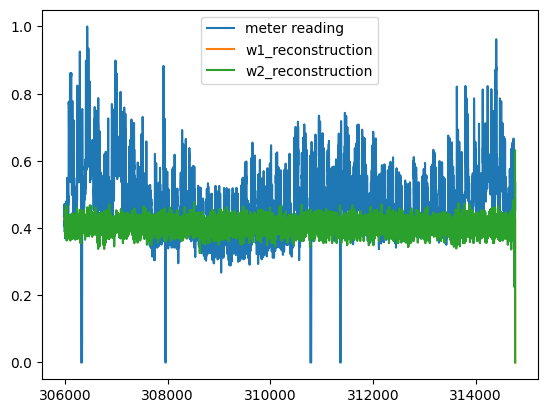

In [166]:
plt.plot(visualizations.meter_reading, label = "meter reading") #predicted_df_test.meter_reading[:8784]
plt.plot(visualizations.reconstruction, label = "w1_reconstruction")
plt.plot(visualizations.reconstruction2, label = "w2_reconstruction")
plt.legend()
plt.show()

In [ ]:
predicted_anomalies = predicted_df_test.loc[predicted_df_test['predicted_anomaly'] == 1]
true_anomalies = predicted_df_test.loc[predicted_df_test['anomaly'] == 1]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predicted_df_test.index, y=predicted_df_test['meter_reading'], name='meter readings'))
fig.add_trace(go.Scatter(x=predicted_df_test.index, y=predicted_df_test['reconstruction'], name='meter readings reconstructed'))

fig.add_trace(go.Scatter(x=true_anomalies['timestamp'], y=true_anomalies['meter_reading'], mode='markers', marker=dict(color='forestgreen'), name='True_Anomaly'))
fig.update_layout(showlegend=True, title='meter readings predicted and anomalies - val')
fig.show()

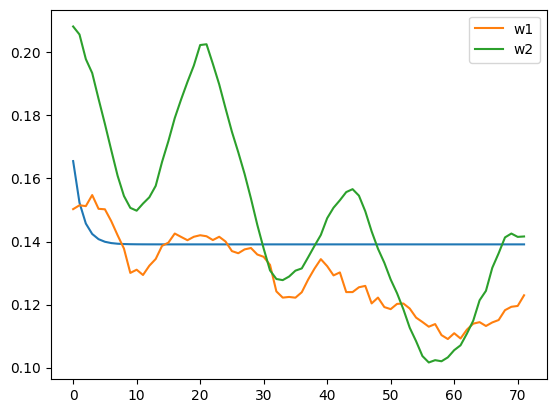

In [56]:
plt.plot(batches[0][3])
plt.plot(w1[0][3].cpu(), label = "w1")
plt.plot(w2[0][3].cpu(), label = "w2")
plt.legend()
plt.show()

In [44]:
len(results), len(results[0])

(2587, 128)

In [45]:
results[-1]

tensor([0.0075, 0.0074, 0.0074, 0.0074, 0.0073, 0.0073, 0.0072, 0.0072, 0.0072,
        0.0071, 0.0071, 0.0071, 0.0071, 0.0070, 0.0070, 0.0071, 0.0071, 0.0071,
        0.0072, 0.0072, 0.0073, 0.0073, 0.0074, 0.0074, 0.0074, 0.0073, 0.0073,
        0.0072, 0.0071, 0.0071, 0.0070, 0.0069, 0.0069, 0.0068, 0.0068, 0.0068,
        0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0066, 0.0066,
        0.0066, 0.0066, 0.0066], device='cuda:0')

In [45]:
(len(results)-1) * len(results[0]) + len(results[-1])

331094

In [46]:
len(test.anomaly)

333792

Let's create the dataset to perform predictions.

In [47]:
scaler = MinMaxScaler(feature_range=(0,1))

In [48]:
dfs_dict_1 = {}
for building_id, gdf in test.groupby("building_id"):
  gdf[['meter_reading', 'sea_level_pressure']]=scaler.fit_transform(gdf[['meter_reading', 'sea_level_pressure']])
  dfs_dict_1[building_id] = gdf[train_window:]
predicted_df = pd.concat(dfs_dict_1.values())

In [49]:
lista = []
for el in results:
  for el2 in el:
    lista.append(el2.cpu().item())

In [50]:
lista

[0.08931779861450195,
 0.08785402774810791,
 0.08987598121166229,
 0.09199131280183792,
 0.09756380319595337,
 0.08929254859685898,
 0.09064553678035736,
 0.09327985346317291,
 0.0893876850605011,
 0.08939452469348907,
 0.09777641296386719,
 0.09199722856283188,
 0.09777897596359253,
 0.09199850261211395,
 0.09199872612953186,
 0.09070005267858505,
 0.09831033647060394,
 0.09777981042861938,
 0.09199892729520798,
 0.09777982532978058,
 0.08940136432647705,
 0.10279249399900436,
 0.08940136432647705,
 0.09854806214570999,
 0.09329771995544434,
 0.09070014953613281,
 0.09199893474578857,
 0.09070014953613281,
 0.09070014953613281,
 0.09488938748836517,
 0.08940136432647705,
 0.09937149286270142,
 0.09777982532978058,
 0.09199893474578857,
 0.09199893474578857,
 0.09070014953613281,
 0.09777982532978058,
 0.08940136432647705,
 0.09070014953613281,
 0.08940136432647705,
 0.09648104012012482,
 0.10226194560527802,
 0.09070014953613281,
 0.09199893474578857,
 0.09199893474578857,
 0.09070014

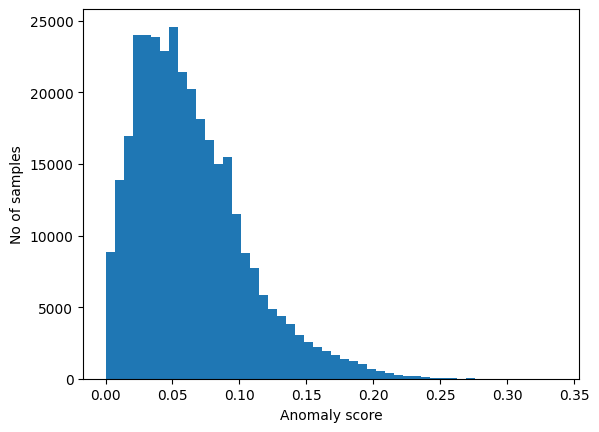

In [51]:
plt.hist(lista, bins=50)
plt.xlabel("Anomaly score")
plt.ylabel("No of samples")
plt.show()

In [52]:
predicted_df['predictions'] = lista

In [53]:
predicted_df

building_id                    primary_use  \
2016-01-04 00:00:00           69                        Parking   
2016-01-04 01:00:00           69                        Parking   
2016-01-04 02:00:00           69                        Parking   
2016-01-04 03:00:00           69                        Parking   
2016-01-04 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-04 00:00:00       0.139088            0.757143           0        0   
2016-01-04 01:00:00       0.139088            0.760317           0        0   
2016-01-04 02:00:00       0.139088            0.746032           0        0   
2016-01-04 03:00:00       0.139088            0.742857           0        0   
2016-01-04 04:00:00       0.139088            0.738095           0        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511            0.000000           0        0   
2016-12-31 20:00:00       0.336511            0.000000           0        0   
2016-12-31 21:00:00       0.336511            0.000000           0        0   
2016-12-31 22:00:00       0.336511            0.000000           0        0   
2016-12-31 23:00:00       0.336511            0.000000           0        0   

                     weekday  weekday_y  weekday_x  predictions  
2016-01-04 00:00:00        0   0.000000   1.000000     0.089318  
2016-01-04 01:00:00        0   0.000000   1.000000     0.087854  
2016-01-04 02:00:00        0   0.000000   1.000000     0.089876  
2016-01-04 03:00:00        0   0.000000   1.000000     0.091991  
2016-01-04 04:00:00        0   0.000000   1.000000     0.097564  
...                      ...        ...        ...          ...  
2016-12-31 19:00:00        5  -0.974928  -0.222521     0.011459  
2016-12-31 20:00:00        5  -0.974928  -0.222521     0.032368  
2016-12-31 21:00:00        5  -0.974928  -0.222521     0.018471  
2016-12-31 22:00:00        5  -0.974928  -0.222521     0.025560  
2016-12-31 23:00:00        5  -0.974928  -0.222521     0.025483  

[331056 rows x 10 columns]

In [54]:
predicted_df.predictions.min(), predicted_df.predictions.max() #Ricorda: non sono vere e proprie predizioni, si tratta dell'anomaly score

(0.00012814116780646145, 0.33683156967163086)

In [55]:
perc = 90
threshold = (np.percentile(predicted_df.predictions.values, perc))

In [56]:
threshold

0.11859667673707008

In [57]:
predicted_df['threshold'] = threshold

In [58]:
predicted_df['predicted_anomaly'] = predicted_df.predictions > predicted_df['threshold']#anomalies #predicted_df['threshold']#
predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(False,0)
predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(True,1)

/tmp/ipykernel_23126/3264709519.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(True,1)


In [59]:
predicted_df

building_id                    primary_use  \
2016-01-04 00:00:00           69                        Parking   
2016-01-04 01:00:00           69                        Parking   
2016-01-04 02:00:00           69                        Parking   
2016-01-04 03:00:00           69                        Parking   
2016-01-04 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-04 00:00:00       0.139088            0.757143           0        0   
2016-01-04 01:00:00       0.139088            0.760317           0        0   
2016-01-04 02:00:00       0.139088            0.746032           0        0   
2016-01-04 03:00:00       0.139088            0.742857           0        0   
2016-01-04 04:00:00       0.139088            0.738095           0        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511            0.000000           0        0   
2016-12-31 20:00:00       0.336511            0.000000           0        0   
2016-12-31 21:00:00       0.336511            0.000000           0        0   
2016-12-31 22:00:00       0.336511            0.000000           0        0   
2016-12-31 23:00:00       0.336511            0.000000           0        0   

                     weekday  weekday_y  weekday_x  predictions  threshold  \
2016-01-04 00:00:00        0   0.000000   1.000000     0.089318   0.118597   
2016-01-04 01:00:00        0   0.000000   1.000000     0.087854   0.118597   
2016-01-04 02:00:00        0   0.000000   1.000000     0.089876   0.118597   
2016-01-04 03:00:00        0   0.000000   1.000000     0.091991   0.118597   
2016-01-04 04:00:00        0   0.000000   1.000000     0.097564   0.118597   
...                      ...        ...        ...          ...        ...   
2016-12-31 19:00:00        5  -0.974928  -0.222521     0.011459   0.118597   
2016-12-31 20:00:00        5  -0.974928  -0.222521     0.032368   0.118597   
2016-12-31 21:00:00        5  -0.974928  -0.222521     0.018471   0.118597   
2016-12-31 22:00:00        5  -0.974928  -0.222521     0.025560   0.118597   
2016-12-31 23:00:00        5  -0.974928  -0.222521     0.025483   0.118597   

                     predicted_anomaly  
2016-01-04 00:00:00                  0  
2016-01-04 01:00:00                  0  
2016-01-04 02:00:00                  0  
2016-01-04 03:00:00                  0  
2016-01-04 04:00:00                  0  
...                                ...  
2016-12-31 19:00:00                  0  
2016-12-31 20:00:00                  0  
2016-12-31 21:00:00                  0  
2016-12-31 22:00:00                  0  
2016-12-31 23:00:00                  0  

[331056 rows x 12 columns]

In [60]:
predicted_df.predicted_anomaly.unique()

array([0, 1])

In [61]:
len(predicted_df[predicted_df.predicted_anomaly == 1])/len(predicted_df)

0.10000120825479678

In [62]:
predicted_df.index.names=['timestamp']
predicted_df= predicted_df.reset_index()

In [63]:
predicted_df = pd.merge(predicted_df, df[['timestamp','building_id']], on=['timestamp','building_id'])

In [64]:
print(classification_report(predicted_df.anomaly, predicted_df.predicted_anomaly))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94    322044
           1       0.04      0.19      0.07      7635

    accuracy                           0.89    329679
   macro avg       0.51      0.55      0.51    329679
weighted avg       0.96      0.89      0.92    329679



In [65]:
roc_auc_score(predicted_df['anomaly'], predicted_df['predicted_anomaly'])

0.5463886653860938